# **ChefBot**

สมาชิกกลุ่ม 1

1. ก้องภพ ทองดี 63340500003 
2. ภคพล ลีลาคหกิจ 63340500045
3. สรพัศ วีระกุล 63340500064
4. อธิเมศร์  เอี๊ยวเจริญ 63340500068 

# **Import Library**

In [2]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import tensorflow as tf
print(tf. __version__) 
print(tf.config.list_physical_devices('GPU'))

import matplotlib as mpl
import matplotlib.font_manager as fm

fm.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

np.random.seed(0)
global_seed = 0

pic_path = 'pic/'

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **Import data**

In [3]:
df_orig = pandas.read_csv('data/Chefbot_Dataset - All.csv', encoding='utf-8')

In [4]:
# Display the first 5 rows of the dataframe
display(df_orig.head(n=5))
# Display the last 5 rows of the dataframe
display(df_orig.tail(n=5))

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


,Text,Mainclass,Subclass
571,เมนูที่เอาเส้นพาสต้ามาผัดกับของทะเลแล้วแล้วก็ใ...,สปาเกตตี,สปาเกตตีทะเล
572,สปาเกตตีที่มีสีแดง และเขียวตัดกับ สีของเส้นที่...,สปาเกตตี,สปาเกตตีทะเล
573,ฉันอยากกินสปาเกตตีแต่ฉันเบื่อพวกเนื้อ หมู ไก่แ...,สปาเกตตี,สปาเกตตีทะเล
574,สปาเกตตีที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์,สปาเกตตี,สปาเกตตีทะเล
575,สปาเกตตีที่ให้รสชาติเผ็ดจัดจ้าน มีกุ้ง มีหมึก ...,สปาเกตตี,สปาเกตตีทะเล


# **Data Preprocessing**

In [5]:
df_prepro = df_orig.copy()

## **Data Cleaning**

In [6]:
display(df_prepro.describe())
display(df_prepro.Mainclass.unique())
display(df_prepro.Subclass.unique())

,Text,Mainclass,Subclass
count,576,576,576
unique,576,3,12
top,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
freq,1,192,48


array(['พิซซ่า', 'ก๋วยเตี๋ยว', 'สปาเกตตี'], dtype=object)

array(['ค็อกเทลกุ้ง', 'มีทเดอลุกซ์', 'เห็ดและมะเขือเทศ', 'ดิปเปอร์',
       'ก๋วยเตี๋ยวน้ำตก', 'ก๋วยเตี๋ยวต้มยำน้ำใส', 'บะหมีหมูแดงหมูกรอบ',
       'เกาเหลา', 'สปาเกตตีมีทบอล', 'สปาเกตตีคาโบนาร่า', 'สปาเกตตีผัก',
       'สปาเกตตีทะเล'], dtype=object)

### **Remove Duplications in text inputs**

In [7]:
# display all text that appears more than once
display(df_prepro[df_prepro.duplicated('Text', keep=False)].sort_values('Text'))
# Then no duplicates

,Text,Mainclass,Subclass


### **Remove unwanted character**

#### **Front-Back white space**

In [8]:
def strip_space(text):
    return text.strip()

df_prepro['Text'] = df_prepro['Text'].apply(strip_space)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove white space between words**

In [9]:
def remove_whitespace(text):
    return text.replace(" ", "")

df_prepro['Text'] = df_prepro['Text'].apply(remove_whitespace)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆกับน้ำสลัดเทาซันไอส...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมๆสามารถแบ่งเป็นชิ้นได้กินกั...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove special character and punctuation**

In [10]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
thai_punctuation = 'ๆ'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation + thai_punctuation))
 
df_prepro['Text'] = df_prepro['Text'].apply(remove_punctuation)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,พิซซ่า,ค็อกเทลกุ้ง


### **Label Mapping**

In [11]:
def get_label_map(df, col_name):
    label_map = {}
    for i, label in enumerate(df[col_name].unique()):
        label_map[label] = i
    reversed_label_map = {v: k for k, v in label_map.items()}
    return label_map, reversed_label_map

#### **Get main class labels**

In [12]:
mainclass_label_map, reversed_mainclass_label_map = get_label_map(df_prepro, 'Mainclass')

display(mainclass_label_map)

df_prepro['Mainclass'] = df_prepro['Mainclass'].map(mainclass_label_map)

display(df_prepro.head())

{'พิซซ่า': 0, 'ก๋วยเตี๋ยว': 1, 'สปาเกตตี': 2}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,ค็อกเทลกุ้ง


#### **Get sub class labels**

In [13]:
subclass_label_map, reversed_subclass_label_map = get_label_map(df_prepro, 'Subclass')

display(subclass_label_map)

df_prepro['Subclass'] = df_prepro['Subclass'].map(subclass_label_map)

display(df_prepro.head())

{'ค็อกเทลกุ้ง': 0,
 'มีทเดอลุกซ์': 1,
 'เห็ดและมะเขือเทศ': 2,
 'ดิปเปอร์': 3,
 'ก๋วยเตี๋ยวน้ำตก': 4,
 'ก๋วยเตี๋ยวต้มยำน้ำใส': 5,
 'บะหมีหมูแดงหมูกรอบ': 6,
 'เกาเหลา': 7,
 'สปาเกตตีมีทบอล': 8,
 'สปาเกตตีคาโบนาร่า': 9,
 'สปาเกตตีผัก': 10,
 'สปาเกตตีทะเล': 11}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,0
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,0
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,0
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,0
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,0


## **Data Visualization**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_sentence_length_distribution(df, col_name):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (12, 8)
    
    bin_size = 5
    bins = np.arange(0, 100, bin_size)
    plt.hist(df[col_name].str.len(), bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='train')
    xticks = np.arange(0, 150, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, 100, bin_size)
    plt.yticks(yticks, yticks)
    plt.title('Sentence Length Distribution')
    plt.legend(loc='upper right')
    plt.xlabel('Sentence Length')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name].str.len(), bins=bins)[0]):
        plt.text(a + 2.5, b + 2.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

### **Plotting the length of the text data**

In [16]:
# plot_sentence_length_distribution(df_prepro, 'Text')

#### **Maximum length of text inputs**

In [17]:
print('Max sentence length: %d' % df_prepro['Text'].str.len().max())

df_prepro['Text'].str.len().describe()

Max sentence length: 165


count    576.000000
mean      87.987847
std       26.557073
min       18.000000
25%       69.000000
50%       86.000000
75%      106.000000
max      165.000000
Name: Text, dtype: float64

### **Plot the distribution of labels**

In [18]:
def plot_label_distribution(df, col_name, title):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (6, 4)
    
    bin_size = 1
    bins = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.hist(df[col_name], bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='data')
    xticks = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, df[col_name].value_counts().max() + 100, 500)
    plt.yticks(yticks, yticks)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.xlabel('Object')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name], bins=bins)[0]):
        plt.text(a + 0.5, b + 0.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

In [19]:
# plot_label_distribution(df_prepro, 'Mainclass', 'Mainclass Distribution')

In [20]:
# plot_label_distribution(df_prepro, 'Subclass', 'Subclass Distribution')

# **Keras Preprocessing**

In [21]:
df_keras = df_prepro.copy()

In [22]:
df_keras = df_keras.to_numpy()
df_keras

array([['อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์แลนด์ที่มีความเข้มข้นหอมแป้งเยอะ',
        0, 0],
       ['ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามสามารถหยิบกินได้เป็นชิ้นเน้นเนื้อที่มาจากทะเล',
        0, 0],
       ['ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ชื่นชอบอาหารทะเลราคาไม่แพงหาซื้อได้ง่าย',
        0, 0],
       ...,
       ['ฉันอยากกินสปาเกตตีแต่ฉันเบื่อพวกเนื้อหมูไก่แล้วช่วยแนะนำเมนูให้ฉันหน่อย',
        2, 11],
       ['สปาเกตตีที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์', 2, 11],
       ['สปาเกตตีที่ให้รสชาติเผ็ดจัดจ้านมีกุ้งมีหมึกมีหอยและยังใส่พวกพริกไทยอ่อน',
        2, 11]], dtype=object)

## **Word Tokenization**

In [23]:
import pythainlp
from pythainlp import word_tokenize
from keras.utils import pad_sequences

In [24]:
input_tokenize = df_keras.copy()
for i, sentence in enumerate(input_tokenize[:, 0]):
    input_tokenize[i, 0] = np.array(word_tokenize(sentence, engine='newmm'), dtype=object)

input_tokenize = np.asarray(input_tokenize, dtype=object)

max_len = max(len(seq) for seq in input_tokenize[:, 0]) + 10

for i in range(len(input_tokenize)):
    input_tokenize[i, 0] = np.pad(input_tokenize[i, 0], (0, max_len - len(input_tokenize[i, 0])), constant_values=" ")

print("Example after padding:")
print(input_tokenize[500])

print(f"Data shape: {input_tokenize.shape}")

for seq in input_tokenize[:, 0]:
    if seq.shape[0] != 50:
        print("ไม่เท่ากับ 50")

print("เท่ากับ 50")

Example after padding:
[array(['อยาก', 'กิน', 'อะไร', 'ก็', 'ได้ที่', 'มี', 'ชีส', 'ผัก', 'เพราะ',
        'กิน', 'คีโม', 'ขอ', 'เมนู', 'ทำ', 'ง่าย', 'ใช้เวลา', 'ไม่', 'นาน',
        'มี', 'สารอาหาร', 'พวก', 'คา', 'โบ', 'ไฮ', 'เด', 'รต', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)
 2 10]
Data shape: (576, 3)
เท่ากับ 50


In [25]:
sentence = input_tokenize[:, 0]
mainclass_labels = input_tokenize[:, 1]
subclass_labels = input_tokenize[:, 2]

print(f'Example sentence: {sentence[0]}')
print(f'Example mainclass label: {mainclass_labels[0]}')
print(f'Example subclass label: {subclass_labels[0]}')

print('Shape')
print(f'Sentence: {sentence.shape}')
print(f'Mainclass label: {mainclass_labels.shape}')
print(f'Subclass label: {subclass_labels.shape}')

Example sentence: ['อยาก' 'กิน' 'กุ้ง' 'ที่จะ' 'มี' 'ความ' 'หนุบ' 'กับ' 'น้ำสลัด' 'เทา'
 'ซัน' 'ไอส์แลนด์' 'ที่' 'มี' 'ความ' 'เข้มข้น' 'หอม' 'แป้ง' 'เยอะ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Example mainclass label: 0
Example subclass label: 0
Shape
Sentence: (576,)
Mainclass label: (576,)
Subclass label: (576,)


## **Word Count**

In [26]:
from collections import Counter

word_counts = Counter()
for data in input_tokenize[:,0]:
    word_counts.update(data)
    
display(word_counts.most_common(15))

[(' ', 16825),
 ('มี', 630),
 ('ที่', 580),
 ('กิน', 360),
 ('และ', 325),
 ('เป็น', 251),
 ('อาหาร', 235),
 ('เส้น', 220),
 ('ได้', 185),
 ('อยาก', 160),
 ('กับ', 144),
 ('ไม่', 140),
 ('ของ', 134),
 ('รสชาติ', 132),
 ('ผัก', 125)]

In [27]:
# Find maximym vocabulary size
max_vocab_size = len(word_counts) + 1 # +1 for unknown token
print(f'Maximum vocabulary size from data set: {max_vocab_size}')
# Find maximum sentence length
max_len = max([len(sentence) for sentence in input_tokenize[:,0]])
print(f'Maximum sentence length from data set: {max_len}')

# Set parameters
max_vocab_size = 5000 # Set maximum vocabulary size to 5000 word (including unknown token)
max_len = 50 # Set maximum sentence length to 50 word per input text

Maximum vocabulary size from data set: 1262
Maximum sentence length from data set: 50


## **Word Vectorization**

In [28]:
sentence[0]

array(['อยาก', 'กิน', 'กุ้ง', 'ที่จะ', 'มี', 'ความ', 'หนุบ', 'กับ',
       'น้ำสลัด', 'เทา', 'ซัน', 'ไอส์แลนด์', 'ที่', 'มี', 'ความ',
       'เข้มข้น', 'หอม', 'แป้ง', 'เยอะ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
      dtype=object)

In [29]:
from pythainlp import word_vector
wordVector = word_vector.WordVector(model_name="thai2fit_wv").get_model() # load thai2fit_wv from pythainlp

In [30]:
def map_word_to_vector(word):
    try:
        return wordVector[word]
    except KeyError:
        return np.zeros(wordVector.vector_size)

sentence_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in input_tokenize[:,0]],dtype=object)

print(f'Sentence vector shape: {sentence_vector.shape}')

Sentence vector shape: (576, 50, 300)


In [31]:
sentence_vector[0].shape

(50, 300)

In [32]:
sentence_vector[0][0].shape

(300,)

### **One-hot encoding**

In [33]:
from keras.utils import to_categorical

mainclass_labels = to_categorical(mainclass_labels)
subclass_labels = to_categorical(subclass_labels)

print('Mainclass labels shape:', mainclass_labels.shape)
print('Subclass labels shape:', subclass_labels.shape)

Mainclass labels shape: (576, 3)
Subclass labels shape: (576, 12)


## **Train-Test Split**

In [34]:
label_mainclass = np.zeros([576,1])
for i in range(0,576):
    label_mainclass[i] = i
# print(label_mainclass)

mainclass_labels = np.concatenate((mainclass_labels, label_mainclass), axis=1)
subclass_labels = np.concatenate((subclass_labels, label_mainclass), axis=1)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_main_class, y_test_main_class, y_train_sub_class, y_test_sub_class = train_test_split(sentence_vector, mainclass_labels, subclass_labels, train_size=0.8, shuffle=True)

In [36]:
label_mainclass_keep_train = y_train_main_class[:, -1]
label_subclass_keep_train = y_train_sub_class[:, -1]
label_mainclass_keep_test = y_test_main_class[:, -1]
label_subclass_keep_test = y_test_sub_class[:, -1]

y_train_main_class = np.delete(y_train_main_class, -1, axis=1)
y_train_sub_class = np.delete(y_train_sub_class, -1, axis=1)
y_test_main_class = np.delete(y_test_main_class, -1, axis=1)
y_test_sub_class = np.delete(y_test_sub_class, -1, axis=1)

In [37]:
print(label_mainclass_keep_train)

[426. 122. 525. 118. 298. 245. 319. 336. 428. 179. 562. 240. 420. 252.
 249. 320. 372. 367. 134. 356. 557. 162. 196. 347. 233. 454. 523. 357.
 140. 521. 404. 113. 378.  76. 172. 505. 157. 572. 515. 312. 348. 303.
 438. 366. 112.  68. 332. 188.  65. 452. 126. 443. 242. 354. 315. 427.
 343. 456. 137. 549.   7. 422. 530. 229. 560. 407. 567. 155. 329. 185.
 101.  97.  20. 153.  54.  30. 334.  49. 100. 425. 284. 358. 316.  56.
 144.  60. 194. 341.   6.   8. 568. 391. 208. 264. 489. 345. 333.  38.
 230. 403. 272. 306. 293. 344. 575. 424. 163. 124. 154. 399.  59. 285.
  48. 541. 570. 468. 310. 516. 243.  55. 171. 469. 181. 158. 246.  34.
 409.  18. 330. 466.  51. 219. 556. 278.  52.  74.  26. 173.  92. 167.
   4. 554. 392. 446. 482.   5. 141. 340. 135. 437. 476.  22. 220. 524.
 120.  81. 400. 571. 561. 555. 160. 564. 238. 350. 402. 195. 191. 116.
 382. 490. 164. 106. 417.  63. 105. 429. 565. 496. 355.  93. 408. 479.
 493. 198. 145. 150.  39. 527. 362. 253. 339.  69.   2. 221. 539. 146.
 289. 

In [38]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train_main_class shape: {y_train_main_class.shape}')
print(f'y_train_sub_class shape: {y_train_sub_class.shape}')
print('-----------------------------------------')
print(f'X_test shape: {X_test.shape}')
print(f'y_test_main_class shape: {y_test_main_class.shape}')
print(f'y_test_sub_class shape: {y_test_sub_class.shape}')

X_train shape: (460, 50, 300)
y_train_main_class shape: (460, 3)
y_train_sub_class shape: (460, 12)
-----------------------------------------
X_test shape: (116, 50, 300)
y_test_main_class shape: (116, 3)
y_test_sub_class shape: (116, 12)


Converting the data from numpy array to Tensorflow Dataset

In [39]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_main_class = tf.convert_to_tensor(y_train_main_class, dtype=tf.float32)
y_test_main_class = tf.convert_to_tensor(y_test_main_class, dtype=tf.float32)
y_train_sub_class = tf.convert_to_tensor(y_train_sub_class, dtype=tf.float32)
y_test_sub_class = tf.convert_to_tensor(y_test_sub_class, dtype=tf.float32)

# **Modeling**

## **Import Library**

In [40]:
# Train model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from time import time
from datetime import timedelta
import keras
from keras.models import load_model
import os

from keras.utils import plot_model

# Build model
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking,LSTM, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten,GlobalMaxPooling1D
from keras.layers import Concatenate, Lambda, Reshape, RepeatVector,Multiply
from keras.optimizers import Adam
from keras import backend as K                                                          
from keras.callbacks import ModelCheckpoint, TensorBoard

# Classifications report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

In [42]:
max_len = 50
word_vector_size = 300
main_class_label = ['Pizza', 'Noodle', 'Spaghetti']
sub_class_label = {
            'Pizza': ['ShrimpCocktail', 'MeatDeluxe', 'MushroomsTomatoes', 'Dipper'],
            'Noodle': ['NamTok', 'TomYam', 'EggNoodles', 'Kaolao'],
            'Spaghetti': ['Meatball', 'Carbonara', 'Vegetable', 'Seafood']
        }

## **Baseline Main-Sub Class Model**

### **Model Architecture**

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 300)]    0           []                               
                                                                                                  
 masking_1 (Masking)            (None, 50, 300)      0           ['input_2[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 48, 32)       28832       ['masking_1[0][0]']              
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 48, 64)      16640       ['conv1d_1[0][0]']               
 )                                                                                          

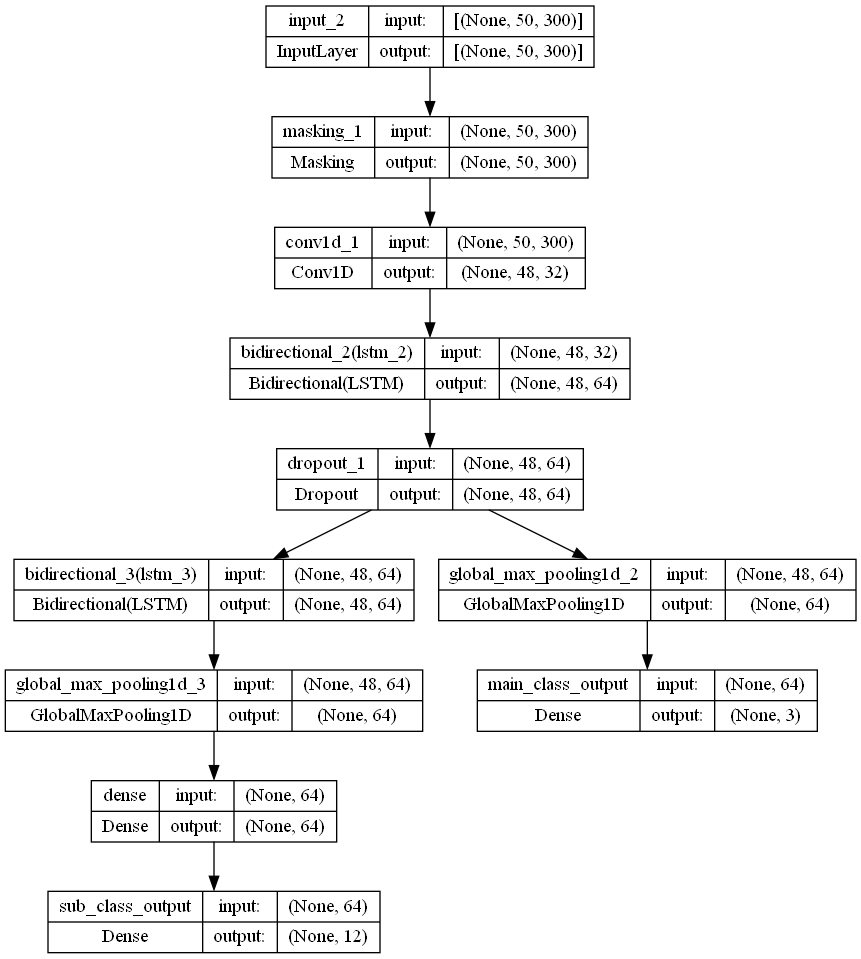

In [88]:
input_layer = Input(shape=(max_len, word_vector_size), dtype='float32')
masking_layer = Masking(mask_value=0.0)(input_layer)
conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(masking_layer)
bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(conv1d_layer_1)
dropout_layer_1 = Dropout(0.2)(bi_lstm_layer_1)
# Main class output
global_max_pooling_layer_1 = GlobalMaxPooling1D()(dropout_layer_1)
main_class_output_layer = Dense(len(main_class_label), activation='softmax', name='main_class_output')(global_max_pooling_layer_1)
# Sub class output
bi_lstm_layer_sub = Bidirectional(LSTM(32, return_sequences=True))(dropout_layer_1)
global_max_pooling_layer_sub = GlobalMaxPooling1D()(bi_lstm_layer_sub)
dense_layer_sub = Dense(64, activation='relu')(global_max_pooling_layer_sub)
sub_class_output_layer = Dense(12, activation='softmax', name='sub_class_output')(dense_layer_sub)

# Define the model
model_base = Model(inputs=input_layer, outputs=[main_class_output_layer,sub_class_output_layer])
         
loss = {'main_class_output': 'categorical_crossentropy',
         'sub_class_output': 'categorical_crossentropy'}
loss_weights = {'main_class_output': 1.0,
                'sub_class_output': 1.0}
metrics = {'main_class_output': 'accuracy',
            'sub_class_output': 'accuracy'}
optimizer = Adam(learning_rate=0.001)
model_base.compile(optimizer=optimizer, loss=loss, loss_weights=loss_weights, metrics=metrics)
model_base.summary()
plot_model(model_base, to_file='BaselineModel.png', show_shapes=True, show_layer_names=True)

### **Model Training**

In [89]:
model_base.fit(
    x = X_train,
    y = {'main_class_output': y_train_main_class,
         'sub_class_output': y_train_sub_class},
    epochs = 15,
    batch_size = 4,
    verbose = 1,
    )

Epoch 1/15
115/115 [==============================] - 13s 57ms/step - loss: 3.5427 - main_class_output_loss: 1.0533 - sub_class_output_loss: 2.4894 - main_class_output_accuracy: 0.4087 - sub_class_output_accuracy: 0.0804
Epoch 2/15
115/115 [==============================] - 6s 55ms/step - loss: 3.1234 - main_class_output_loss: 0.7912 - sub_class_output_loss: 2.3321 - main_class_output_accuracy: 0.6522 - sub_class_output_accuracy: 0.1435
Epoch 3/15
115/115 [==============================] - 7s 57ms/step - loss: 2.7258 - main_class_output_loss: 0.5969 - sub_class_output_loss: 2.1289 - main_class_output_accuracy: 0.7630 - sub_class_output_accuracy: 0.1804
Epoch 4/15
115/115 [==============================] - 6s 52ms/step - loss: 2.1905 - main_class_output_loss: 0.3779 - sub_class_output_loss: 1.8126 - main_class_output_accuracy: 0.8826 - sub_class_output_accuracy: 0.2739
Epoch 5/15
115/115 [==============================] - 6s 55ms/step - loss: 2.0262 - main_class_output_loss: 0.3154 - su

### **Model Evaluation**

In [90]:
pred = model_base.predict(X_test)

4/4 [==============================] - 2s 31ms/step


In [91]:
print(f'Length of pred: {len(pred)}')
print(f'Shape of pred[0]: {pred[0].shape}')
print(f'Shape of pred[1]: {pred[1].shape}')

Length of pred: 2
Shape of pred[0]: (116, 3)
Shape of pred[1]: (116, 12)


#### **Main Class result**

              precision    recall  f1-score   support

           0       0.64      0.91      0.75        33
           1       0.85      0.82      0.84        40
           2       0.80      0.56      0.66        43

    accuracy                           0.75       116
   macro avg       0.76      0.76      0.75       116
weighted avg       0.77      0.75      0.75       116



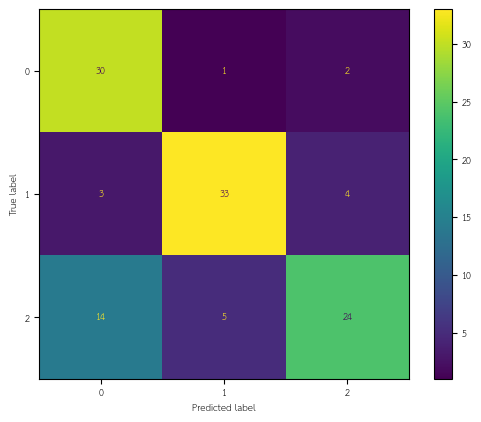

In [92]:
pred_main_class = np.argmax(pred[0], axis=1)
print(classification_report(np.argmax(y_test_main_class, axis=1), pred_main_class))
# plot confusion matrix
cm = confusion_matrix(np.argmax(y_test_main_class, axis=1), pred_main_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2'])
disp.plot()

In [93]:
true_index = []     # เก็บ index ที่ทำนายถูกต้อง
for i in range(len(np.argmax(y_test_main_class, axis=1))):
    if np.argmax(y_test_main_class, axis=1)[i] == np.argmax(pred[0], axis=1)[i]:
        true_index.append(i)

false_main_label_baseline = []        # เก็บ index label ที่ทำนายผิด เพื่อเอา index นี้ไปหาประโยคที่ทำนายผิดใน excel
what_pred = []
for j in range(len(label_mainclass_keep_test)):
    if j not in true_index:
        false_main_label_baseline.append(label_mainclass_keep_test[j])
        what_pred.append(np.argmax(pred[0], axis=1)[j])

print(false_main_label_baseline)
print('------------------------------')
print(what_pred)

[540.0, 497.0, 526.0, 435.0, 498.0, 37.0, 478.0, 1.0, 384.0, 439.0, 276.0, 393.0, 522.0, 484.0, 279.0, 351.0, 271.0, 281.0, 45.0, 441.0, 492.0, 440.0, 533.0, 390.0, 282.0, 261.0, 494.0, 508.0, 397.0]
------------------------------
[1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1]


#### **Sub Class result**

              precision    recall  f1-score   support

           0       0.33      0.36      0.35        11
           1       0.30      0.88      0.45         8
           2       0.12      0.12      0.12         8
           3       0.50      0.33      0.40         6
           4       1.00      0.15      0.27        13
           5       0.10      0.08      0.09        12
           6       0.44      0.57      0.50         7
           7       0.33      0.62      0.43         8
           8       0.24      0.50      0.32         8
           9       1.00      0.10      0.18        10
          10       0.50      0.14      0.22        14
          11       0.36      0.36      0.36        11

    accuracy                           0.32       116
   macro avg       0.44      0.35      0.31       116
weighted avg       0.46      0.32      0.29       116



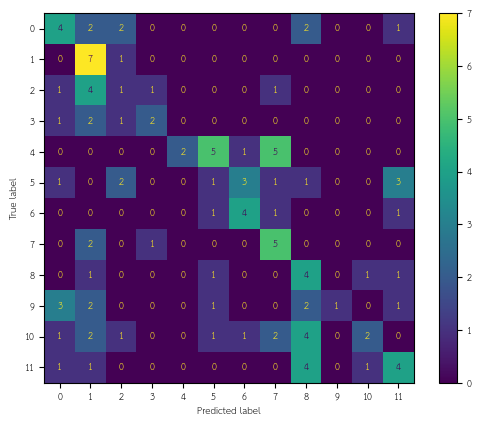

In [94]:
pred_sub_class = np.argmax(pred[1], axis=1)
print(classification_report(np.argmax(y_test_sub_class, axis=1), pred_sub_class,zero_division=0))
# plot confusion matrix
cm = confusion_matrix(np.argmax(y_test_sub_class, axis=1), pred_sub_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11'])
disp.plot()

<H4>Sub class - Baseline

In [95]:
true_index = []     # เก็บ index ที่ทำนายถูกต้อง
for i in range(len(np.argmax(y_test_sub_class, axis=1))):
    if np.argmax(y_test_sub_class, axis=1)[i] == np.argmax(pred[1], axis=1)[i]:
        true_index.append(i)

false_sub_label_baseline = []        # เก็บ index label ที่ทำนายผิด เพื่อเอา index นี้ไปหาประโยคที่ทำนายผิดใน excel
what_pred = []
for j in range(len(label_subclass_keep_test)):
    if j not in true_index:
        false_sub_label_baseline.append(label_subclass_keep_test[j])
        what_pred.append(np.argmax(pred[1], axis=1)[j])

print(false_sub_label_baseline)
print('------------------------------')
print(what_pred)

[96.0, 540.0, 566.0, 236.0, 497.0, 231.0, 477.0, 538.0, 526.0, 175.0, 159.0, 519.0, 435.0, 498.0, 415.0, 545.0, 200.0, 263.0, 37.0, 337.0, 478.0, 250.0, 31.0, 14.0, 1.0, 224.0, 439.0, 395.0, 346.0, 170.0, 569.0, 276.0, 202.0, 210.0, 509.0, 10.0, 132.0, 522.0, 107.0, 484.0, 279.0, 239.0, 235.0, 268.0, 455.0, 514.0, 206.0, 481.0, 351.0, 271.0, 281.0, 45.0, 441.0, 573.0, 492.0, 142.0, 186.0, 311.0, 213.0, 127.0, 247.0, 440.0, 205.0, 433.0, 21.0, 533.0, 262.0, 390.0, 282.0, 299.0, 261.0, 494.0, 434.0, 301.0, 508.0, 102.0, 108.0, 397.0, 85.0]
------------------------------
[1, 1, 8, 7, 1, 5, 5, 8, 1, 1, 1, 8, 1, 2, 10, 8, 5, 2, 8, 1, 0, 6, 2, 2, 11, 5, 0, 11, 3, 2, 8, 11, 7, 7, 8, 1, 7, 7, 3, 6, 0, 6, 5, 6, 11, 5, 7, 8, 1, 2, 11, 8, 1, 10, 0, 1, 0, 7, 5, 0, 7, 0, 7, 8, 1, 0, 6, 1, 8, 11, 11, 8, 8, 5, 7, 1, 1, 5, 2]


## **Modified Main-Sub Class Model**

### **Model Architecture**

In [96]:
class MainSubclassPrediction(Model):
    def __init__(self, max_len, word_vector_size):
        super(MainSubclassPrediction, self).__init__()

        self.max_len = max_len
        self.word_vector_size = word_vector_size
        self.main_class_label = ['Pizza', 'Noodle', 'Spaghetti']
        self.sub_class_label = {
            'Pizza': ['ShrimpCocktail', 'MeatDeluxe', 'MushroomsTomatoes', 'Dipper'],
            'Noodle': ['NamTok', 'TomYam', 'EggNoodles', 'Kaolao'],
            'Spaghetti': ['Meatball', 'Carbonara', 'Vegetable', 'Seafood']
        }
        
        # Model layers (functional API)
        # Main class prediction sub-model
        self.main_class_masking_layer = Masking(mask_value=0.0, name='TextMasking')
        self.main_class_conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu',name='MCConv1d')
        self.main_class_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True,name= 'MCLSTM'),name='MCBiLSTM')
        self.main_class_dropout_layer_1 = Dropout(0.2,name= 'MCDropout')
        # Main class prediction layer
        self.main_class_global_max_pooling_1d_layer = GlobalMaxPooling1D(name='MCGlobalMaxPooling1D')
        self.main_class_output_layer = Dense(len(self.main_class_label), activation='softmax', name='main_class_output')
        
        # Sub class prediction sub-model
        self.sub_class_main_class_input_argmax_layer = Lambda(lambda x: K.argmax(x, axis=-1),name='MCInArgmax')
        
        ## Sub class of main class 0 ##
        # Masking layer of sub class of main class 0
        self.sub_class_0_reshape_binary_mask_1 = Reshape((-1,),name='SC0Reshape1')
        self.sub_class_0_repeat_binary_mask_1 = RepeatVector(64,name='SC0Repeat1')
        self.sub_class_0_reshape_binary_mask_2 = Reshape((64,),name='SC0Reshape2')
        self.sub_class_0_repeat_binary_mask_2 = RepeatVector(48,name='SC0Repeat2')
        self.sub_class_0_masked_dense_layer = Multiply(name='SC0MaskedDense')
        # Trainable sub class of main class 0
        self.sub_class_0_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True,name='SC0LSTM'),name='SC0BiLSTM')
        self.sub_class_0_global_max_pooling_1d_layer = GlobalMaxPooling1D(name='SC0GlobalMaxPooling1D')
        self.sub_class_0_dense_layer_1 = Dense(64, activation='relu',name='SC0Dense1')
        self.sub_class_0_output_layer = Dense(4, activation='softmax', name='SC0Output')
        
        ## Sub class of main class 1 ##
        # Masking layer of sub class of main class 1
        self.sub_class_1_reshape_binary_mask_1 = Reshape((-1,),name='SC1Reshape1')
        self.sub_class_1_repeat_binary_mask_1 = RepeatVector(64,name='SC1Repeat1')
        self.sub_class_1_reshape_binary_mask_2 = Reshape((64,),name='SC1Reshape2')
        self.sub_class_1_repeat_binary_mask_2 = RepeatVector(48,name='SC1Repeat2')
        self.sub_class_1_masked_dense_layer = Multiply(name='SC1MaskedDense')
        # Trainable sub class of main class 1
        self.sub_class_1_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True,name='SC1LSTM'),name='SC1BiLSTM')
        self.sub_class_1_global_max_pooling_1d_layer = GlobalMaxPooling1D(name='SC1GlobalMaxPooling1D')
        self.sub_class_1_dense_layer_1 = Dense(64, activation='relu',name='SC1Dense1')
        self.sub_class_1_output_layer = Dense(4, activation='softmax', name='SC1Output')
        
        ## Sub class of main class 2 ##
        # Masking layer of sub class of main class 2
        self.sub_class_2_reshape_binary_mask_1 = Reshape((-1,),name='SC2Reshape1')
        self.sub_class_2_repeat_binary_mask_1 = RepeatVector(64,name='SC2Repeat1')
        self.sub_class_2_reshape_binary_mask_2 = Reshape((64,),name='SC2Reshape2')
        self.sub_class_2_repeat_binary_mask_2 = RepeatVector(48,name='SC2Repeat2')
        self.sub_class_2_masked_dense_layer = Multiply(name='SC2MaskedDense')
        # Trainable sub class of main class 2
        self.sub_class_2_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True,name='SC2LSTM'),name='SC2BiLSTM')
        self.sub_class_2_global_max_pooling_1d_layer = GlobalMaxPooling1D(name='SC2GlobalMaxPooling1D')
        self.sub_class_2_dense_layer_1 = Dense(64, activation='relu',name='SC2Dense1')
        self.sub_class_2_output_layer = Dense(4, activation='softmax', name='SC2Output')
        
        # Sub class prediction layer
        self.sub_class_concatenate_layer = Concatenate(axis=-1,name = 'sub_class_output')
        
        # Get Training model
        self.training_model = self.get_training_model()
        self.main_class_inference_model = self.get_mainclass_inference_model()
        self.sub_class_inference_model = self.get_subclass_inference_model()
        self.interaction_model = self.get_interaction_model()
        
    def get_training_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        main_class_input_layer  = Input(shape=(len(self.main_class_label),), dtype='float32', name='main_class_input_layer')
        # Define Main class prediction sub-model
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        # This layer will connect to sub class prediction sub-model
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)

        # Main class output
        global_max_pooling_layer_1 = self.main_class_global_max_pooling_1d_layer(dropout_layer_1)
        main_class_output_layer = self.main_class_output_layer(global_max_pooling_layer_1)
        
        # Define Sub class prediction sub-model
        main_class_input_argmax = self.sub_class_main_class_input_argmax_layer(main_class_input_layer)
        
        # Sub class of main class 0
        # Get binary mask of main class 0
        subclass_0_binary_mask =  K.cast(K.equal(main_class_input_argmax, 0), dtype='float32')
        subclass_0_reshape_binary_mask_1= self.sub_class_0_reshape_binary_mask_1(subclass_0_binary_mask)
        subclass_0_repeat_binary_mask_1 = self.sub_class_0_repeat_binary_mask_1(subclass_0_reshape_binary_mask_1)
        subclass_0_reshape_binary_mask_2 = self.sub_class_0_reshape_binary_mask_2(subclass_0_repeat_binary_mask_1)
        subclass_0_repeat_binary_mask_2 = self.sub_class_0_repeat_binary_mask_2(subclass_0_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_0_masked_dense_layer = self.sub_class_0_masked_dense_layer([dropout_layer_1, subclass_0_repeat_binary_mask_2])
        # Sub class of main class 0 prediction
        subclass_0_bi_lstm_layer_1 = self.sub_class_0_bi_lstm_layer_1(subclass_0_masked_dense_layer)
        subclass_0_global_max_pooling_layer_1 = self.sub_class_0_global_max_pooling_1d_layer(subclass_0_bi_lstm_layer_1)
        subclass_0_dense_layer_1 = self.sub_class_0_dense_layer_1(subclass_0_global_max_pooling_layer_1)
        # Sub class of main class 0 output
        subclass_0_output_layer = self.sub_class_0_output_layer(subclass_0_dense_layer_1)
        
        # Sub class of main class 1
        # Get binary mask of main class 1
        subclass_1_binary_mask =  K.cast(K.equal(main_class_input_argmax, 1), dtype='float32')
        subclass_1_reshape_binary_mask_1= self.sub_class_1_reshape_binary_mask_1(subclass_1_binary_mask)
        subclass_1_repeat_binary_mask_1 = self.sub_class_1_repeat_binary_mask_1(subclass_1_reshape_binary_mask_1)
        subclass_1_reshape_binary_mask_2 = self.sub_class_1_reshape_binary_mask_2(subclass_1_repeat_binary_mask_1)
        subclass_1_repeat_binary_mask_2 = self.sub_class_1_repeat_binary_mask_2(subclass_1_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_1_masked_dense_layer = self.sub_class_1_masked_dense_layer([dropout_layer_1, subclass_1_repeat_binary_mask_2])
        # Sub class of main class 1 prediction
        subclass_1_bi_lstm_layer_1 = self.sub_class_1_bi_lstm_layer_1(subclass_1_masked_dense_layer)
        subclass_1_global_max_pooling_layer_1 = self.sub_class_1_global_max_pooling_1d_layer(subclass_1_bi_lstm_layer_1)
        subclass_1_dense_layer_1 = self.sub_class_1_dense_layer_1(subclass_1_global_max_pooling_layer_1)
        # Sub class of main class 1 output
        subclass_1_output_layer = self.sub_class_1_output_layer(subclass_1_dense_layer_1)
        
        # Sub class of main class 2
        # Get binary mask of main class 2
        subclass_2_binary_mask =  K.cast(K.equal(main_class_input_argmax, 2), dtype='float32')
        subclass_2_reshape_binary_mask_1= self.sub_class_2_reshape_binary_mask_1(subclass_2_binary_mask)
        subclass_2_repeat_binary_mask_1 = self.sub_class_2_repeat_binary_mask_1(subclass_2_reshape_binary_mask_1)
        subclass_2_reshape_binary_mask_2 = self.sub_class_2_reshape_binary_mask_2(subclass_2_repeat_binary_mask_1)
        subclass_2_repeat_binary_mask_2 = self.sub_class_2_repeat_binary_mask_2(subclass_2_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_2_masked_dense_layer = self.sub_class_2_masked_dense_layer([dropout_layer_1, subclass_2_repeat_binary_mask_2])
        # Sub class of main class 2 prediction
        subclass_2_bi_lstm_layer_1 = self.sub_class_2_bi_lstm_layer_1(subclass_2_masked_dense_layer)
        subclass_2_global_max_pooling_layer_1 = self.sub_class_2_global_max_pooling_1d_layer(subclass_2_bi_lstm_layer_1)
        subclass_2_dense_layer_1 = self.sub_class_2_dense_layer_1(subclass_2_global_max_pooling_layer_1)
        # Sub class of main class 2 output
        subclass_2_output_layer = self.sub_class_2_output_layer(subclass_2_dense_layer_1)
        
        # Concatenate all outputs
        concat_layer = self.sub_class_concatenate_layer([subclass_0_output_layer, subclass_1_output_layer, subclass_2_output_layer])
        
        # Define model
        model = Model(inputs=[text_input_layer, main_class_input_layer], outputs=[main_class_output_layer,concat_layer])
        loss = {'main_class_output': 'categorical_crossentropy',
                'sub_class_output': 'categorical_crossentropy'}
        loss_weights = {'main_class_output': 1.0,
                        'sub_class_output': 1.0}
        metrics = {'main_class_output': 'accuracy',
                    'sub_class_output': 'accuracy'}
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=loss, loss_weights=loss_weights, metrics=metrics)
        return model
    
    def get_interaction_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        main_class_input_layer  = Input(shape=(len(self.main_class_label),), dtype='float32', name='main_class_input_layer')
        # Define Main class prediction sub-model
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        # This layer will connect to sub class prediction sub-model
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)
        
        # Define Sub class prediction sub-model
        main_class_input_argmax = self.sub_class_main_class_input_argmax_layer(main_class_input_layer)
        
        # Sub class of main class 0
        # Get binary mask of main class 0
        subclass_0_binary_mask =  K.cast(K.equal(main_class_input_argmax, 0), dtype='float32')
        subclass_0_reshape_binary_mask_1= self.sub_class_0_reshape_binary_mask_1(subclass_0_binary_mask)
        subclass_0_repeat_binary_mask_1 = self.sub_class_0_repeat_binary_mask_1(subclass_0_reshape_binary_mask_1)
        subclass_0_reshape_binary_mask_2 = self.sub_class_0_reshape_binary_mask_2(subclass_0_repeat_binary_mask_1)
        subclass_0_repeat_binary_mask_2 = self.sub_class_0_repeat_binary_mask_2(subclass_0_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_0_masked_dense_layer = self.sub_class_0_masked_dense_layer([dropout_layer_1, subclass_0_repeat_binary_mask_2])
        # Sub class of main class 0 prediction
        subclass_0_bi_lstm_layer_1 = self.sub_class_0_bi_lstm_layer_1(subclass_0_masked_dense_layer)
        subclass_0_global_max_pooling_layer_1 = self.sub_class_0_global_max_pooling_1d_layer(subclass_0_bi_lstm_layer_1)
        subclass_0_dense_layer_1 = self.sub_class_0_dense_layer_1(subclass_0_global_max_pooling_layer_1)
        # Sub class of main class 0 output
        subclass_0_output_layer = self.sub_class_0_output_layer(subclass_0_dense_layer_1)
        
        # Sub class of main class 1
        # Get binary mask of main class 1
        subclass_1_binary_mask =  K.cast(K.equal(main_class_input_argmax, 1), dtype='float32')
        subclass_1_reshape_binary_mask_1= self.sub_class_1_reshape_binary_mask_1(subclass_1_binary_mask)
        subclass_1_repeat_binary_mask_1 = self.sub_class_1_repeat_binary_mask_1(subclass_1_reshape_binary_mask_1)
        subclass_1_reshape_binary_mask_2 = self.sub_class_1_reshape_binary_mask_2(subclass_1_repeat_binary_mask_1)
        subclass_1_repeat_binary_mask_2 = self.sub_class_1_repeat_binary_mask_2(subclass_1_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_1_masked_dense_layer = self.sub_class_1_masked_dense_layer([dropout_layer_1, subclass_1_repeat_binary_mask_2])
        # Sub class of main class 1 prediction
        subclass_1_bi_lstm_layer_1 = self.sub_class_1_bi_lstm_layer_1(subclass_1_masked_dense_layer)
        subclass_1_global_max_pooling_layer_1 = self.sub_class_1_global_max_pooling_1d_layer(subclass_1_bi_lstm_layer_1)
        subclass_1_dense_layer_1 = self.sub_class_1_dense_layer_1(subclass_1_global_max_pooling_layer_1)
        # Sub class of main class 1 output
        subclass_1_output_layer = self.sub_class_1_output_layer(subclass_1_dense_layer_1)
        
        # Sub class of main class 2
        # Get binary mask of main class 2
        subclass_2_binary_mask =  K.cast(K.equal(main_class_input_argmax, 2), dtype='float32')
        subclass_2_reshape_binary_mask_1= self.sub_class_2_reshape_binary_mask_1(subclass_2_binary_mask)
        subclass_2_repeat_binary_mask_1 = self.sub_class_2_repeat_binary_mask_1(subclass_2_reshape_binary_mask_1)
        subclass_2_reshape_binary_mask_2 = self.sub_class_2_reshape_binary_mask_2(subclass_2_repeat_binary_mask_1)
        subclass_2_repeat_binary_mask_2 = self.sub_class_2_repeat_binary_mask_2(subclass_2_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_2_masked_dense_layer = self.sub_class_2_masked_dense_layer([dropout_layer_1, subclass_2_repeat_binary_mask_2])
        # Sub class of main class 2 prediction
        subclass_2_bi_lstm_layer_1 = self.sub_class_2_bi_lstm_layer_1(subclass_2_masked_dense_layer)
        subclass_2_global_max_pooling_layer_1 = self.sub_class_2_global_max_pooling_1d_layer(subclass_2_bi_lstm_layer_1)
        subclass_2_dense_layer_1 = self.sub_class_2_dense_layer_1(subclass_2_global_max_pooling_layer_1)
        # Sub class of main class 2 output
        subclass_2_output_layer = self.sub_class_2_output_layer(subclass_2_dense_layer_1)
        
        # Concatenate all outputs
        concat_layer = self.sub_class_concatenate_layer([subclass_0_output_layer, subclass_1_output_layer, subclass_2_output_layer])
        
        # Define model
        model = Model(inputs=[text_input_layer, main_class_input_layer], outputs=[concat_layer])
        return model
    
    def get_subclass_inference_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        # Define layers
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)
        # Main class prediction
        global_max_pooling_layer_1 = self.main_class_global_max_pooling_1d_layer(dropout_layer_1)
        main_class_output_layer = self.main_class_output_layer(global_max_pooling_layer_1)
        
        ## Get binary mask of main class from main class prediction ##
        main_class_pred_argmax = K.argmax(main_class_output_layer, axis=1)
        
        # Sub class of main class 0
        # Get binary mask of main class 0
        subclass_0_binary_mask =  K.cast(K.equal(main_class_pred_argmax, 0), dtype='float32')
        subclass_0_reshape_binary_mask_1= self.sub_class_0_reshape_binary_mask_1(subclass_0_binary_mask)
        subclass_0_repeat_binary_mask_1 = self.sub_class_0_repeat_binary_mask_1(subclass_0_reshape_binary_mask_1)
        subclass_0_reshape_binary_mask_2 = self.sub_class_0_reshape_binary_mask_2(subclass_0_repeat_binary_mask_1)
        subclass_0_repeat_binary_mask_2 = self.sub_class_0_repeat_binary_mask_2(subclass_0_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_0_masked_dense_layer = self.sub_class_0_masked_dense_layer([dropout_layer_1, subclass_0_repeat_binary_mask_2])
        # Sub class of main class 0 prediction
        subclass_0_bi_lstm_layer_1 = self.sub_class_0_bi_lstm_layer_1(subclass_0_masked_dense_layer)
        subclass_0_global_max_pooling_layer_1 = self.sub_class_0_global_max_pooling_1d_layer(subclass_0_bi_lstm_layer_1)
        subclass_0_dense_layer_1 = self.sub_class_0_dense_layer_1(subclass_0_global_max_pooling_layer_1)
        # Sub class of main class 0 output
        subclass_0_output_layer = self.sub_class_0_output_layer(subclass_0_dense_layer_1)
        
        # Sub class of main class 1
        # Get binary mask of main class 1
        subclass_1_binary_mask =  K.cast(K.equal(main_class_pred_argmax, 1), dtype='float32')
        subclass_1_reshape_binary_mask_1= self.sub_class_1_reshape_binary_mask_1(subclass_1_binary_mask)
        subclass_1_repeat_binary_mask_1 = self.sub_class_1_repeat_binary_mask_1(subclass_1_reshape_binary_mask_1)
        subclass_1_reshape_binary_mask_2 = self.sub_class_1_reshape_binary_mask_2(subclass_1_repeat_binary_mask_1)
        subclass_1_repeat_binary_mask_2 = self.sub_class_1_repeat_binary_mask_2(subclass_1_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_1_masked_dense_layer = self.sub_class_1_masked_dense_layer([dropout_layer_1, subclass_1_repeat_binary_mask_2])
        # Sub class of main class 1 prediction
        subclass_1_bi_lstm_layer_1 = self.sub_class_1_bi_lstm_layer_1(subclass_1_masked_dense_layer)
        subclass_1_global_max_pooling_layer_1 = self.sub_class_1_global_max_pooling_1d_layer(subclass_1_bi_lstm_layer_1)
        subclass_1_dense_layer_1 = self.sub_class_1_dense_layer_1(subclass_1_global_max_pooling_layer_1)
        # Sub class of main class 1 output
        subclass_1_output_layer = self.sub_class_1_output_layer(subclass_1_dense_layer_1)
        
        # Sub class of main class 2
        # Get binary mask of main class 2
        subclass_2_binary_mask =  K.cast(K.equal(main_class_pred_argmax, 2), dtype='float32')
        subclass_2_reshape_binary_mask_1= self.sub_class_2_reshape_binary_mask_1(subclass_2_binary_mask)
        subclass_2_repeat_binary_mask_1 = self.sub_class_2_repeat_binary_mask_1(subclass_2_reshape_binary_mask_1)
        subclass_2_reshape_binary_mask_2 = self.sub_class_2_reshape_binary_mask_2(subclass_2_repeat_binary_mask_1)
        subclass_2_repeat_binary_mask_2 = self.sub_class_2_repeat_binary_mask_2(subclass_2_reshape_binary_mask_2)
        # Apply binary mask to dropout layer
        subclass_2_masked_dense_layer = self.sub_class_2_masked_dense_layer([dropout_layer_1, subclass_2_repeat_binary_mask_2])
        # Sub class of main class 2 prediction
        subclass_2_bi_lstm_layer_1 = self.sub_class_2_bi_lstm_layer_1(subclass_2_masked_dense_layer)
        subclass_2_global_max_pooling_layer_1 = self.sub_class_2_global_max_pooling_1d_layer(subclass_2_bi_lstm_layer_1)
        subclass_2_dense_layer_1 = self.sub_class_2_dense_layer_1(subclass_2_global_max_pooling_layer_1)
        # Sub class of main class 2 output
        subclass_2_output_layer = self.sub_class_2_output_layer(subclass_2_dense_layer_1)
        
        # Concatenate all outputs
        concat_layer = self.sub_class_concatenate_layer([subclass_0_output_layer, subclass_1_output_layer, subclass_2_output_layer])
        
        # Define model
        model = Model(inputs=[text_input_layer], outputs=[concat_layer],name='sub_class_inference_model')
        return model
        

    def get_mainclass_inference_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        # Define layers
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)
        # Main class output
        global_max_pooling_layer_1 = self.main_class_global_max_pooling_1d_layer(dropout_layer_1)
        main_class_output_layer = self.main_class_output_layer(global_max_pooling_layer_1)
        # Main class inference model
        main_class_inference_model = Model(inputs=text_input_layer, outputs=main_class_output_layer, name='main_class_inference_model')
        return main_class_inference_model
    
    def training_model_train(self, train_data, epochs, batch_size, validation_data=None, model_path=None):
        [X_text_train, x_main_class_train], [y_main_class_train, y_sub_class_train] = train_data
        if validation_data is not None:
            [X_text_val, x_main_class_val], [y_main_class_val, y_sub_class_val] = validation_data
            self.training_model.fit(x={'text_input_layer': X_text_train,
                              'main_class_input_layer': x_main_class_train},
                            y={'main_class_output': y_main_class_train,
                                'sub_class_output': y_sub_class_train},
                            validation_data=({'text_input_layer': X_text_val,
                                              'main_class_input_layer': x_main_class_val},
                                                {'main_class_output': y_main_class_val,
                                                'sub_class_output': y_sub_class_val}),
                            epochs=epochs,
                            batch_size=batch_size)
        else:
            self.training_model.fit(x={'text_input_layer': X_text_train,
                             'main_class_input_layer': x_main_class_train},
                            y={'main_class_output': y_main_class_train,
                                'sub_class_output': y_sub_class_train},
                            epochs=epochs,
                            batch_size=batch_size)

        if model_path is not None:
            self.training_model.save(model_path)
        
        # Update inference model
        self.main_class_inference_model = self.get_mainclass_inference_model()
        self.sub_class_inference_model = self.get_subclass_inference_model()
        self.interaction_model = self.get_interaction_model()

    def predict_with_main_label(self, X_text, X_main_class):
        pred_main, pred_sub = self.training_model.predict({'text_input_layer': X_text, 'main_class_input_layer': X_main_class})
        pred_main = np.argmax(pred_main, axis=1)
        pred_sub = np.argmax(pred_sub, axis=1)
        return pred_main, pred_sub
    
    def predict_subclass(self, X_text):
        pred_sub = self.sub_class_inference_model.predict(X_text)
        pred_sub = np.argmax(pred_sub, axis=1)
        return pred_sub
    
    def predict_mainclass(self, X_text):
        pred_main = self.main_class_inference_model.predict(X_text)
        pred_main = np.argmax(pred_main, axis=1)
        return pred_main
    
    def predict_interaction(self, X_text, X_main_class):
        pred_interaction = self.interaction_model.predict({'text_input_layer': X_text, 'main_class_input_layer': X_main_class})
        pred_interaction = np.argmax(pred_interaction, axis=1)
        return pred_interaction
    
    def plot_result_mainclass(self, Y_true, Y_pred):
        # Get label names
        main_class_label = self.main_class_label
        # Print classification report
        print(f'Classification report for main class:\n{classification_report(Y_true, Y_pred,target_names=main_class_label,zero_division=1)}')
        # PLot confusion matrix
        plt.figure(figsize=(10,10))
        cm_main = confusion_matrix(Y_true, Y_pred)
        disp_main = ConfusionMatrixDisplay(confusion_matrix=cm_main, display_labels=main_class_label)
        disp_main.plot()
        
    def plot_result_subclass(self, Y_true, Y_pred):
        # Get label names
        subclass_label = [sub_class for main_class in self.sub_class_label for sub_class in self.sub_class_label[main_class]]
        # Print classification report
        print(f'Classification report for sub class:\n{classification_report(Y_true, Y_pred,target_names=subclass_label,zero_division=1)}')
        # PLot confusion matrix
        plt.figure(figsize=(10,10))
        cm_sub = confusion_matrix(Y_true, Y_pred)
        disp_sub = ConfusionMatrixDisplay(confusion_matrix=cm_sub, display_labels=subclass_label)
        disp_sub.plot()
        
    def load_weight_training_model(self, weight_path):
        self.training_model.load_weights(weight_path)
    
    def load_weight_mainclass_inference_model(self, weight_path):
        self.main_class_inference_model.load_weights(weight_path)
        
    def load_weight_subclass_inference_model(self, weight_path):
        self.sub_class_inference_model.load_weights(weight_path)
        
    def load_weight_interaction_model(self, weight_path):
        self.interaction_model.load_weights(weight_path)

### **Get Model**

In [97]:
modmodel = MainSubclassPrediction(50, 300)          

### **Model Training**

In [98]:
modmodel.training_model_train(train_data=([X_train, y_train_main_class], [y_train_main_class, y_train_sub_class]),
            epochs=15,
            batch_size=4,
            )

Epoch 1/15
115/115 [==============================] - 22s 85ms/step - loss: 3.5376 - main_class_output_loss: 1.0405 - sub_class_output_loss: 2.4971 - main_class_output_accuracy: 0.4848 - sub_class_output_accuracy: 0.1870
Epoch 2/15
115/115 [==============================] - 10s 87ms/step - loss: 3.2580 - main_class_output_loss: 0.7861 - sub_class_output_loss: 2.4719 - main_class_output_accuracy: 0.6674 - sub_class_output_accuracy: 0.3022
Epoch 3/15
115/115 [==============================] - 10s 89ms/step - loss: 3.0393 - main_class_output_loss: 0.5977 - sub_class_output_loss: 2.4416 - main_class_output_accuracy: 0.7761 - sub_class_output_accuracy: 0.3435
Epoch 4/15
115/115 [==============================] - 31s 273ms/step - loss: 2.6897 - main_class_output_loss: 0.3970 - sub_class_output_loss: 2.2927 - main_class_output_accuracy: 0.8630 - sub_class_output_accuracy: 0.4717
Epoch 5/15
115/115 [==============================] - 4s 36ms/step - loss: 2.5178 - main_class_output_loss: 0.2951 

### **Evaluation**

#### **Main Class Model**

In [111]:
y_pred_main = modmodel.predict_mainclass(X_test)

4/4 [==============================] - 0s 6ms/step


Classification report for main class:
              precision    recall  f1-score   support

       Pizza       0.74      0.79      0.76        33
      Noodle       0.85      0.85      0.85        40
   Spaghetti       0.71      0.67      0.69        43

    accuracy                           0.77       116
   macro avg       0.77      0.77      0.77       116
weighted avg       0.77      0.77      0.77       116



<Figure size 1000x1000 with 0 Axes>

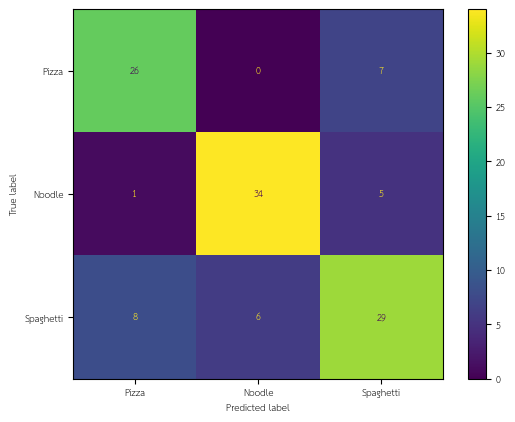

In [112]:
modmodel.plot_result_mainclass(np.argmax(y_test_main_class, axis=1), y_pred_main)

<H4>Main class - Modified

In [113]:
true_index = []     # เก็บ index ที่ทำนายถูกต้อง
for i in range(len(np.argmax(y_test_main_class, axis=1))):
    if np.argmax(y_test_main_class, axis=1)[i] == y_pred_main[i]:
        true_index.append(i)

false_main_label_full_model = []        # เก็บ index label ที่ทำนายผิด เพื่อเอา index นี้ไปหาประโยคที่ทำนายผิดใน excel
what_pred = []
for j in range(len(label_mainclass_keep_test)):
    if j not in true_index:
        false_main_label_full_model.append(label_mainclass_keep_test[j])
        what_pred.append(y_pred_main[j])

print(false_main_label_full_model)
print('------------------------------')
print(what_pred)

[540.0, 497.0, 477.0, 526.0, 435.0, 498.0, 545.0, 263.0, 37.0, 478.0, 439.0, 569.0, 276.0, 522.0, 107.0, 15.0, 351.0, 17.0, 281.0, 45.0, 186.0, 127.0, 533.0, 390.0, 282.0, 261.0, 397.0]
------------------------------
[1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1]


#### **Sub Class Model (Don't Take Mainclass as input)**

In [114]:
y_pred_sub = modmodel.predict_subclass(X_test)

4/4 [==============================] - 0s 22ms/step


Classification report for sub class:
                   precision    recall  f1-score   support

   ShrimpCocktail       0.50      0.45      0.48        11
       MeatDeluxe       0.46      0.75      0.57         8
MushroomsTomatoes       0.25      0.12      0.17         8
           Dipper       0.38      0.50      0.43         6
           NamTok       0.78      0.54      0.64        13
           TomYam       0.31      0.33      0.32        12
       EggNoodles       0.50      0.57      0.53         7
           Kaolao       0.60      0.75      0.67         8
         Meatball       0.20      0.25      0.22         8
        Carbonara       0.00      0.00      0.00        10
        Vegetable       0.40      0.43      0.41        14
          Seafood       0.46      0.55      0.50        11

         accuracy                           0.43       116
        macro avg       0.40      0.44      0.41       116
     weighted avg       0.41      0.43      0.41       116



<Figure size 1000x1000 with 0 Axes>

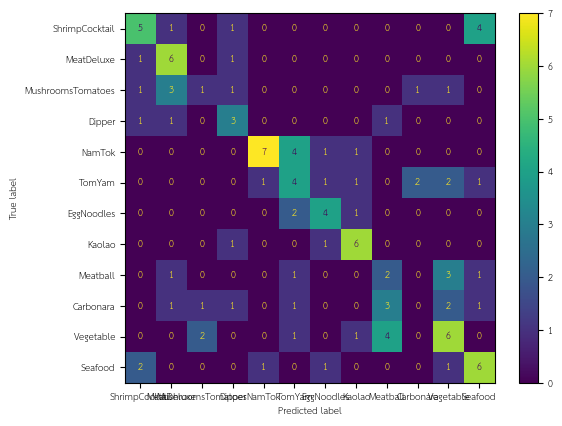

In [115]:
modmodel.plot_result_subclass(np.argmax(y_test_sub_class, axis=1), y_pred_sub)

<H4>Sub class - Modified

In [116]:
true_index = []    
for i in range(len(np.argmax(y_test_sub_class, axis=1))):
    if np.argmax(y_test_sub_class, axis=1)[i] == y_pred_sub[i]:
        true_index.append(i)

false_sub_label_full_model = []
what_pred = []    
for j in range(len(label_subclass_keep_test)):
    if j not in true_index:
        false_sub_label_full_model.append(label_subclass_keep_test[j])
        what_pred.append(y_pred_sub[j])

print(false_sub_label_full_model)
print('------------------------------')
print(what_pred)

[414.0, 540.0, 497.0, 231.0, 477.0, 211.0, 526.0, 175.0, 159.0, 225.0, 435.0, 498.0, 415.0, 545.0, 263.0, 37.0, 478.0, 250.0, 31.0, 342.0, 14.0, 439.0, 395.0, 569.0, 276.0, 202.0, 210.0, 509.0, 132.0, 393.0, 522.0, 107.0, 15.0, 235.0, 75.0, 103.0, 455.0, 481.0, 351.0, 17.0, 271.0, 281.0, 45.0, 473.0, 441.0, 573.0, 492.0, 142.0, 186.0, 311.0, 127.0, 440.0, 433.0, 533.0, 390.0, 282.0, 299.0, 261.0, 494.0, 434.0, 301.0, 102.0, 283.0, 108.0, 397.0, 85.0]
------------------------------
[10, 4, 7, 5, 5, 5, 2, 0, 1, 5, 3, 2, 10, 6, 10, 11, 1, 6, 3, 6, 1, 2, 10, 0, 11, 7, 6, 8, 3, 11, 5, 9, 11, 5, 0, 1, 10, 8, 3, 11, 7, 10, 11, 10, 11, 10, 8, 1, 8, 7, 10, 8, 8, 0, 1, 9, 5, 9, 8, 8, 5, 0, 4, 1, 5, 3]


#### **Interaction Model**

In [117]:
pred_interaction = modmodel.predict_interaction(X_test, y_test_main_class)

4/4 [==============================] - 0s 61ms/step


Classification report for sub class:
                   precision    recall  f1-score   support

   ShrimpCocktail       0.73      0.73      0.73        11
       MeatDeluxe       0.50      0.75      0.60         8
MushroomsTomatoes       0.67      0.25      0.36         8
           Dipper       0.43      0.50      0.46         6
           NamTok       0.78      0.54      0.64        13
           TomYam       0.57      0.67      0.62        12
       EggNoodles       0.57      0.57      0.57         7
           Kaolao       0.70      0.88      0.78         8
         Meatball       0.29      0.50      0.36         8
        Carbonara       1.00      0.10      0.18        10
        Vegetable       0.56      0.64      0.60        14
          Seafood       0.83      0.91      0.87        11

         accuracy                           0.59       116
        macro avg       0.64      0.59      0.56       116
     weighted avg       0.65      0.59      0.58       116



<Figure size 1000x1000 with 0 Axes>

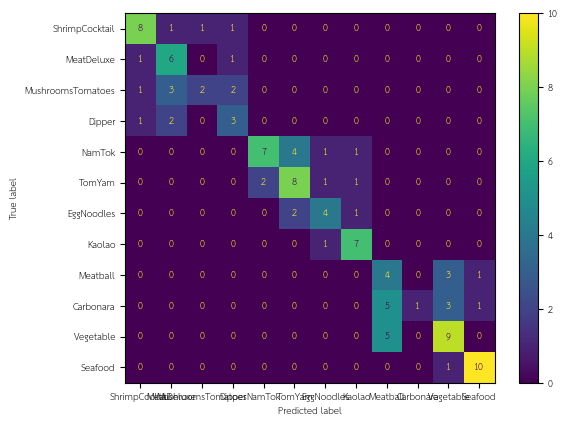

In [118]:
modmodel.plot_result_subclass(np.argmax(y_test_sub_class, axis=1), pred_interaction)

<H4>Interaction model

In [119]:
true_index = []    
for i in range(len(np.argmax(y_test_sub_class, axis=1))):
    if np.argmax(y_test_sub_class, axis=1)[i] == pred_interaction[i]:
        true_index.append(i)

false_sub_label_interaction = []
what_pred = []    
for j in range(len(label_subclass_keep_test)):
    if j not in true_index:
        false_sub_label_interaction.append(label_subclass_keep_test[j])
        what_pred.append(pred_interaction[j])

print(false_sub_label_interaction)
print('------------------------------')
print(what_pred)

[414.0, 497.0, 231.0, 477.0, 211.0, 175.0, 159.0, 225.0, 415.0, 478.0, 250.0, 31.0, 342.0, 14.0, 439.0, 395.0, 202.0, 210.0, 509.0, 132.0, 393.0, 107.0, 15.0, 235.0, 75.0, 103.0, 455.0, 481.0, 271.0, 281.0, 473.0, 441.0, 573.0, 492.0, 142.0, 186.0, 311.0, 440.0, 433.0, 299.0, 494.0, 434.0, 301.0, 102.0, 283.0, 108.0, 85.0]
------------------------------
[10, 8, 5, 8, 5, 0, 1, 5, 10, 8, 6, 3, 6, 1, 10, 10, 7, 6, 8, 3, 11, 3, 2, 5, 0, 1, 10, 8, 7, 4, 10, 11, 10, 8, 1, 1, 7, 8, 8, 5, 8, 8, 5, 0, 4, 1, 3]


#### **Save Model**

In [120]:
ModelTraining = modmodel.training_model
MainModel = modmodel.main_class_inference_model
SubModel = modmodel.sub_class_inference_model
InteractionModel = modmodel.interaction_model

In [121]:
# ModelTraining.save('ModelTraining.h5')
# MainModel.save('MainModel.h5')
# SubModel.save('SubModel.h5')
# InteractionModel.save('InteractionModel.h5')

In [122]:
# plot_model(ModelTraining, to_file='ModelTraining.png', show_shapes=True, show_layer_names=True)
# plot_model(MainModel, to_file='MainModel.png', show_shapes=True, show_layer_names=True)
# plot_model(SubModel, to_file='SubModel.png', show_shapes=True, show_layer_names=True)
# plot_model(InteractionModel, to_file='InteractionModel.png', show_shapes=True, show_layer_names=True)